<h1 align='center'> Linear Regression Experiment Real World </h1>

In [90]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn

<h3>Importing depdencies. </h3>

In [91]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


<h3> Data Collecting and Preprocessing </h3>

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


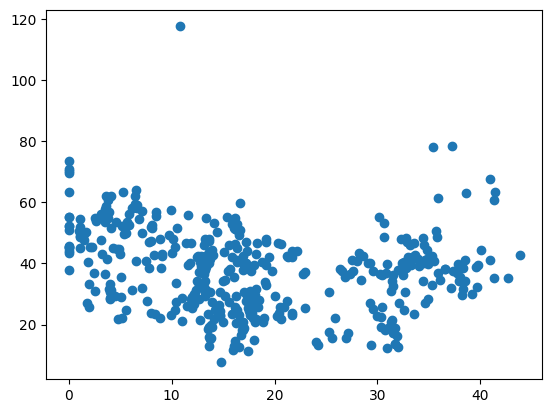

In [129]:
data_csv=pd.read_csv('data\\Real_estate.csv')
display(data_csv)
#plt.bar(data_csv['X3 distance to the nearest MRT station'],data_csv['Y house price of unit area'])

plt.scatter(data_csv['X2 house age'],data_csv['Y house price of unit area'])
data_csv=data_csv.drop(columns=['X1 transaction date','X3 distance to the nearest MRT station','X4 number of convenience stores'])

In [123]:

X=data_csv.drop(columns=['No','Y house price of unit area']).to_numpy()
Y=data_csv['Y house price of unit area'].to_numpy()
Y=Y.reshape(-1,1)

X=torch.from_numpy(X)
Y=torch.from_numpy(Y)
display(X[0:5],Y[0:5])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train=X_train.float()
X_test=X_test.float()
y_train=y_train.float()
y_test=y_test.float()

tensor([[ 32.0000,  24.9830, 121.5402],
        [ 19.5000,  24.9803, 121.5395],
        [ 13.3000,  24.9875, 121.5439],
        [ 13.3000,  24.9875, 121.5439],
        [  5.0000,  24.9794, 121.5425]], dtype=torch.float64)

tensor([[37.9000],
        [42.2000],
        [47.3000],
        [54.8000],
        [43.1000]], dtype=torch.float64)

<h3>Pytorch Model Building </h3>

In [124]:
# Define the Linear Regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        # Ensure that the input tensor and weight tensor have the same data type
        return self.linear(x)

<h3>Initialization Model </h3>

In [126]:
torch.manual_seed(42)
input_size = X_train.shape[1]

model = LinearRegression(input_size)
print(model.parameters())

# Convert the input tensor to the appropriate data type (Float)
input_tensor = torch.tensor([32.0000,  24.9830, 121.5402]).float()
print(model(input_tensor))

<generator object Module.parameters at 0x0000025B540CE420>
tensor([10.1882], grad_fn=<AddBackward0>)


<h3> Training Model </h3>

In [135]:
torch.manual_seed(42)

epoch_list=[]
train_list=[]
test_list=[]

# Define loss function and optimizer
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X_train)
    #print(y_pred)
    # Compute loss
    loss = criterion(y_pred, y_train)    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        test_pred=model(X_test)
        test_loss=criterion(test_pred,y_test)
        if epoch%100==0:
            train_list.append(loss.detach().numpy())
            test_list.append(test_loss.detach().numpy())
            epoch_list.append(epoch)
            print(f'Epoch: {epoch} || Train Loss: {loss} || Test loss: {test_loss}')

Epoch: 0 || Train Loss: 10.469860076904297 || Test loss: 10.401965141296387
Epoch: 100 || Train Loss: 10.469751358032227 || Test loss: 10.400064468383789
Epoch: 200 || Train Loss: 10.469733238220215 || Test loss: 10.404987335205078
Epoch: 300 || Train Loss: 10.469767570495605 || Test loss: 10.40911865234375
Epoch: 400 || Train Loss: 10.469786643981934 || Test loss: 10.408207893371582
Epoch: 500 || Train Loss: 10.469815254211426 || Test loss: 10.401264190673828
Epoch: 600 || Train Loss: 10.469736099243164 || Test loss: 10.4053955078125
Epoch: 700 || Train Loss: 10.46973991394043 || Test loss: 10.410317420959473
Epoch: 800 || Train Loss: 10.469780921936035 || Test loss: 10.408416748046875
Epoch: 900 || Train Loss: 10.4697904586792 || Test loss: 10.4079008102417
Epoch: 1000 || Train Loss: 10.469761848449707 || Test loss: 10.400362968444824
Epoch: 1100 || Train Loss: 10.46972942352295 || Test loss: 10.4050874710083
Epoch: 1200 || Train Loss: 10.469755172729492 || Test loss: 10.409418106079

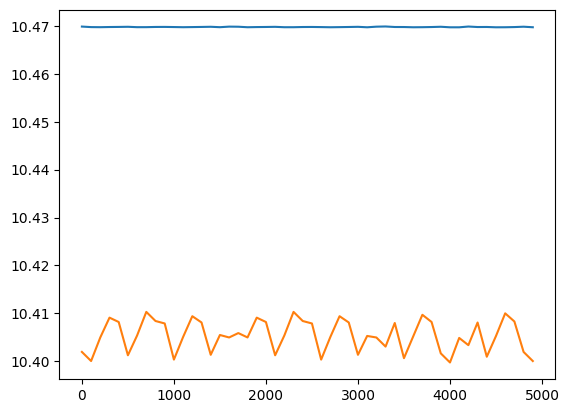

In [136]:
plt.plot(epoch_list,train_list)
plt.plot(epoch_list,test_list)

In [140]:
with torch.inference_mode():
    op=model(X_test)

for pred,gt in zip(op,y_test):
    print(f'Predicted: {pred}, Actual: {gt}')

Predicted: tensor([43.9724]), Actual: tensor([[45.1000],
        [42.3000],
        [52.2000],
        [37.3000],
        [22.8000],
        [36.3000],
        [53.0000],
        [51.4000],
        [16.1000],
        [59.0000],
        [30.6000],
        [30.7000],
        [35.6000],
        [13.7000],
        [62.9000],
        [30.5000],
        [41.9000],
        [54.4000],
        [29.5000],
        [43.7000],
        [12.2000],
        [22.1000],
        [49.5000],
        [47.4000],
        [18.6000],
        [28.5000],
        [14.7000],
        [45.4000],
        [41.0000],
        [35.1000],
        [22.1000],
        [28.9000],
        [30.5000],
        [26.5000],
        [49.3000],
        [37.0000],
        [56.3000],
        [15.4000],
        [48.5000],
        [63.3000],
        [50.5000],
        [42.2000],
        [37.9000],
        [37.5000],
        [40.5000],
        [57.4000],
        [26.5000],
        [21.8000],
        [49.7000],
        [47.1000],
        [49.